In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [ ]:
train_df = pd.read_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\House_Prices-Advanced_Regression_Techniques\\datasets\\train.csv')

In [ ]:
test_df = pd.read_csv('C:\\Users\\loren\\Desktop\\ML_Workspace\\Projects\\House_Prices-Advanced_Regression_Techniques\\datasets\\test.csv')

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
train_df.columns

In [ ]:
train_df.describe

In [ ]:
train_df.describe()

In [ ]:
train_df.dtypes[train_df.dtypes != 'object']

In [ ]:
plt.scatter(x='MSSubClass',y='SalePrice', data = train_df)

In [ ]:
plt.scatter(x='LotFrontage',y='SalePrice', data = train_df)

In [ ]:
train_df.query('LotFrontage > 300')
#Drop 935, 1299

In [ ]:
plt.scatter(x='LotArea',y='SalePrice', data = train_df)

In [ ]:
train_df.query('LotArea > 55000')
# 250, 314, 336,,707,

In [ ]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

In [ ]:
plt.scatter(x='OverallQual', y='SalePrice', data =train_df
           )

In [ ]:
train_df.query('OverallQual ==10') # maybe 524

In [ ]:
plt.scatter(x='OverallCond', y = 'SalePrice', data = train_df)

In [ ]:
train_df.query('OverallCond ==2') #379

In [ ]:
train_df.query('OverallCond ==5 & SalePrice>700000')
# 1183

In [ ]:
train_df.query('OverallCond ==6 & SalePrice>700000')
#693


In [ ]:
plt.scatter(x='YearBuilt', y = 'SalePrice', data = train_df)

In [24]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000') # 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [26]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


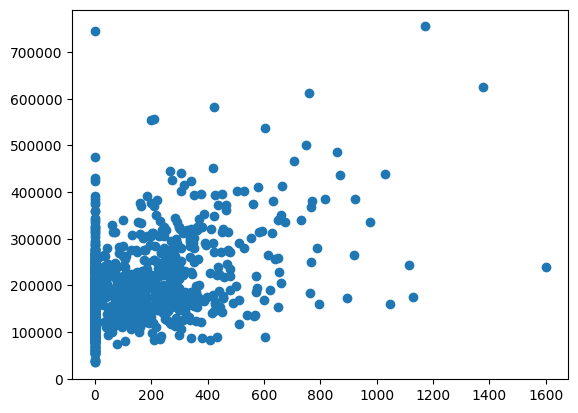

In [31]:
plt.scatter(x='MasVnrArea', y = 'SalePrice', data = train_df)
train_df.query('MasVnrArea > 1500')


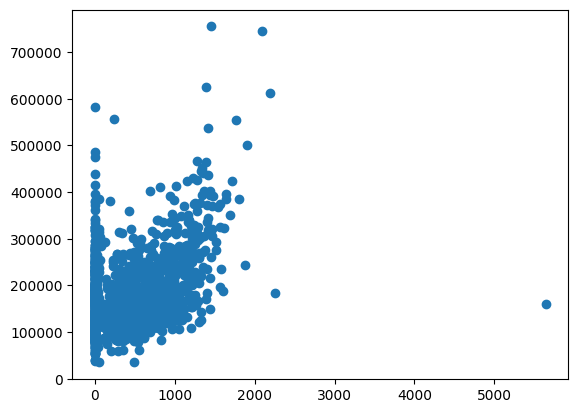

In [33]:
plt.scatter(x='BsmtFinSF1', y = 'SalePrice', data = train_df)


In [35]:
train_df.query('BsmtFinSF1 > 5000')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [38]:
values = [598,955,935,1299,250,314,336,707,379,1183,692,186,441,186,524,739,955,1062,1191,494]

In [39]:
train_df = train_df[train_df.Id.isin(values) == False]

In [40]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1437
MiscFeature,1391
Alley,1351
Fence,1163
MasVnrType,864
FireplaceQu,687
LotFrontage,255
GarageYrBlt,79
GarageCond,79
GarageType,79
